# Analysing the Data of Framingham Heart study dataset

**AIM:** The aim of this study is to predict the heart disese. Classification models are used to analyse the data and
the results of the model are analysed and the state of disease is predicted. 

**Description of the Dataset:**
    
The Data of Framingham Heart study dataset has recorded different constrains of Heart Disease.

**Description of the Dataset:**
Total observation: 4239
Attributes:
1.	age
2.	Gender (Female - 0; Male - 1)
3.	education (1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college)
4.	currentSmoker (Nonsmoker -0; Smoker - 1)
5.	cigsPerDay (number of cigarettes smoked per day (estimated average))
6.	BPMeds (0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications)
7.	prevalentStroke  (0 = No; 1 = Yes)
8.	prevalentHyp  (0 = No; 1 = Yes)
9.	diabetes (0 = No; 1 = Yes)
10.	totChol
11.	sysBP
12.	diaBP
13.	BMI
14.	heartRate
15.	glucose	
16.	TenYearCHD (Coronary Heart Disease (10-year risk)) (0 = No; 1 = Yes)

Source: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [3]:
import pandas as pd  
import numpy as np                                         # import Numerical programming package 
import matplotlib.pyplot as plt                            # import Matplotlib (plotting library) 
import seaborn as sns                                      #import Seaborn a Python data visualization library
import time                                                #import time
import os                                                  # Import OS Module

from sklearn.model_selection import train_test_split        # Import train_test_split function
from sklearn import metrics                                 #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import ConfusionMatrixDisplay          #Import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression         # Import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier     # Import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier           # Import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier         # Import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier          # Import KNeighborsClassifier
from sklearn import naive_bayes                             # Import Naive Bayes
from sklearn.tree import DecisionTreeClassifier             # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split        # Import train_test_split function
from sklearn.tree import plot_tree                          # Import plot_tree
from sklearn.tree import export_graphviz                    # Import graphviz
from sklearn.externals.six import StringIO                  # Import StringIO 
from IPython.display import Image                           #Import IPython for interactive computing in multiple programming languages)
import pydotplus                                            # Import Python Interface to Graphviz
from sklearn.model_selection import GridSearchCV            # Import GridSearchCV
from sklearn.metrics import roc_auc_score                   # Import roc_auc_score
from sklearn.metrics import roc_curve                       # Import roc_curve

**Import data**

In [4]:
Heart=pd.read_csv('framingham.csv', encoding="ISO-8859-1") #import data

Heart.head()                                                                                                 # viewing imported data                                                                                   

,age,Gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,1,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Preprocessing Data**

Review Data 


In [5]:
rows, columns = Heart.shape
print("Rows:", rows)                                                #Total row of the observations
print("Columns:", columns)                                          #Total column of the observations
Heart.isnull().any()                                                #True or false

Rows: 4238
Columns: 16


age                False
Gender             False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

Removing Countries with NaN

In [6]:
print(Heart.shape)
Heart = Heart.dropna()
print(Heart.shape)
print(Heart.isnull().sum())                                                         #How many are null

(4238, 16)
(3656, 16)
age                0
Gender             0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


**Dataframe Outline** 

In [7]:
Heart.dtypes

age                  int64
Gender               int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
Heart.columns

Index(['age', 'Gender', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Presenting the Data:**   

The features used for this data are 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'
       
 The below charts depicts as follows: 
1.	Prevalent Stroke: Prevalent Stroke is found only among 25.
2.	Prevalent hyperthermia: Prevalent hyperthermia is found 1316
3.	Total Cholesterol (Total Cholesterol should be less than 200 mg/dL): In this report, around 1500 were have around 220 to 260 mg/dL and around 180mg/dL in 800, 300mg/dL in 750, 120 mg/dL in 100350 mg/dL in 300 were noticed. 
4.	Systolic blood pressure: Around 1400 numbers were having systolic blood pressure around 110 to 120. And which gradually reduced to 120 in around 100 patients. On otherhand less than 100 have around 200 systolic bp.  
5.	BMI: Around more than 1600 have BMI around 24 to 26 biomass indexes.
6.	Heart Rate: For 1300 persons the heart was around 80 (pulse) per minute which reduced 75 in around 1200. Which drastically reduced to around 40 and 75 (pulse) per minute for 500 and 600 numbers. And yet got reduced to less than 100 patients. 
7.	Current Smoker: Among 2000 are current smoker.
8.	Blood Pressure medications: Less than 125 are in Blood Pressure medications. 
9.	Prevalent Stroke: Around 25 have the history of prevalent Stroke.
10.	Diabetic: Around 109 are diabetic.
11.	Ten-year coronary heart disease: Less than 750 have the history of ten-year coronary heart disease conditions. 
12.	Glucose: Around 2000 have glucose level around 75 to 110.
13.	Gender: Around 1800 were male in that population.
14.	Diabetes Blood pressure: Around 1250 patients had 80 to 90 mg/Hg and less than 250 patient had 60 mg/Hg and less than 100 patients have more than 120 mg/Hg. 
15.	Education: More than 1500 patients had high school education and less than 400 had college education.
16.	Age: More patients were among the age group 40 to 48.


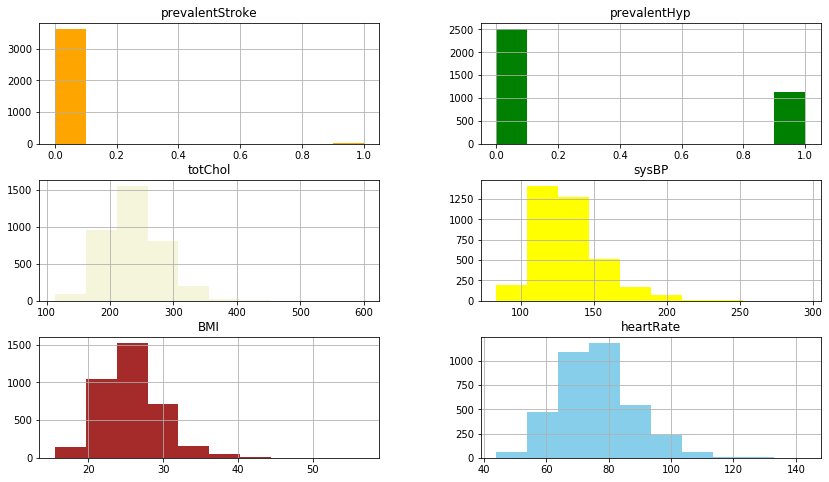

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(14,8)
fig.subplots_adjust(wspace=0.6)

Heart.hist(column='prevalentStroke', ax=axes[0,0], color ="orange")
Heart.hist(column='prevalentHyp', ax=axes[0,1], color ="green") 
Heart.hist(column='totChol', ax=axes[1,0], color ="beige") 
Heart.hist(column='sysBP', ax=axes[1,1], color ="yellow")
Heart.hist(column='BMI', ax=axes[2,0], color ="brown")
Heart.hist(column='heartRate', ax=axes[2,1], color ="skyblue") 

plt.show()


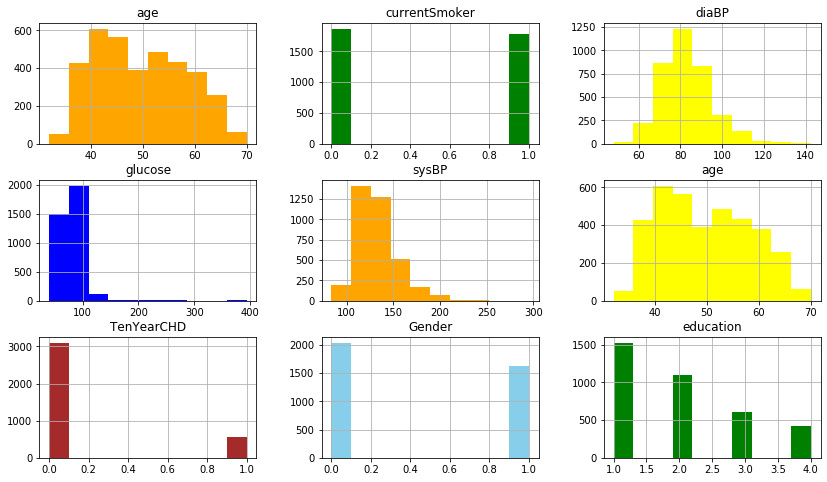

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(14,8)
fig.subplots_adjust(wspace=0.6)

Heart.hist(column='age', ax=axes[0,0], color ="orange")
Heart.hist(column='currentSmoker', ax=axes[0,1], color ="green") 
Heart.hist(column='diaBP', ax=axes[0,2], color ="yellow") 
Heart.hist(column='glucose', ax=axes[1,0], color ="blue") 
Heart.hist(column='sysBP', ax=axes[1,1], color ="orange")
Heart.hist(column='age', ax=axes[1,2], color ="yellow")
Heart.hist(column='TenYearCHD', ax=axes[2,0], color ="brown")
Heart.hist(column='Gender', ax=axes[2,1], color ="skyblue") 
Heart.hist(column='education', ax=axes[2,2], color ="green") 

plt.show()


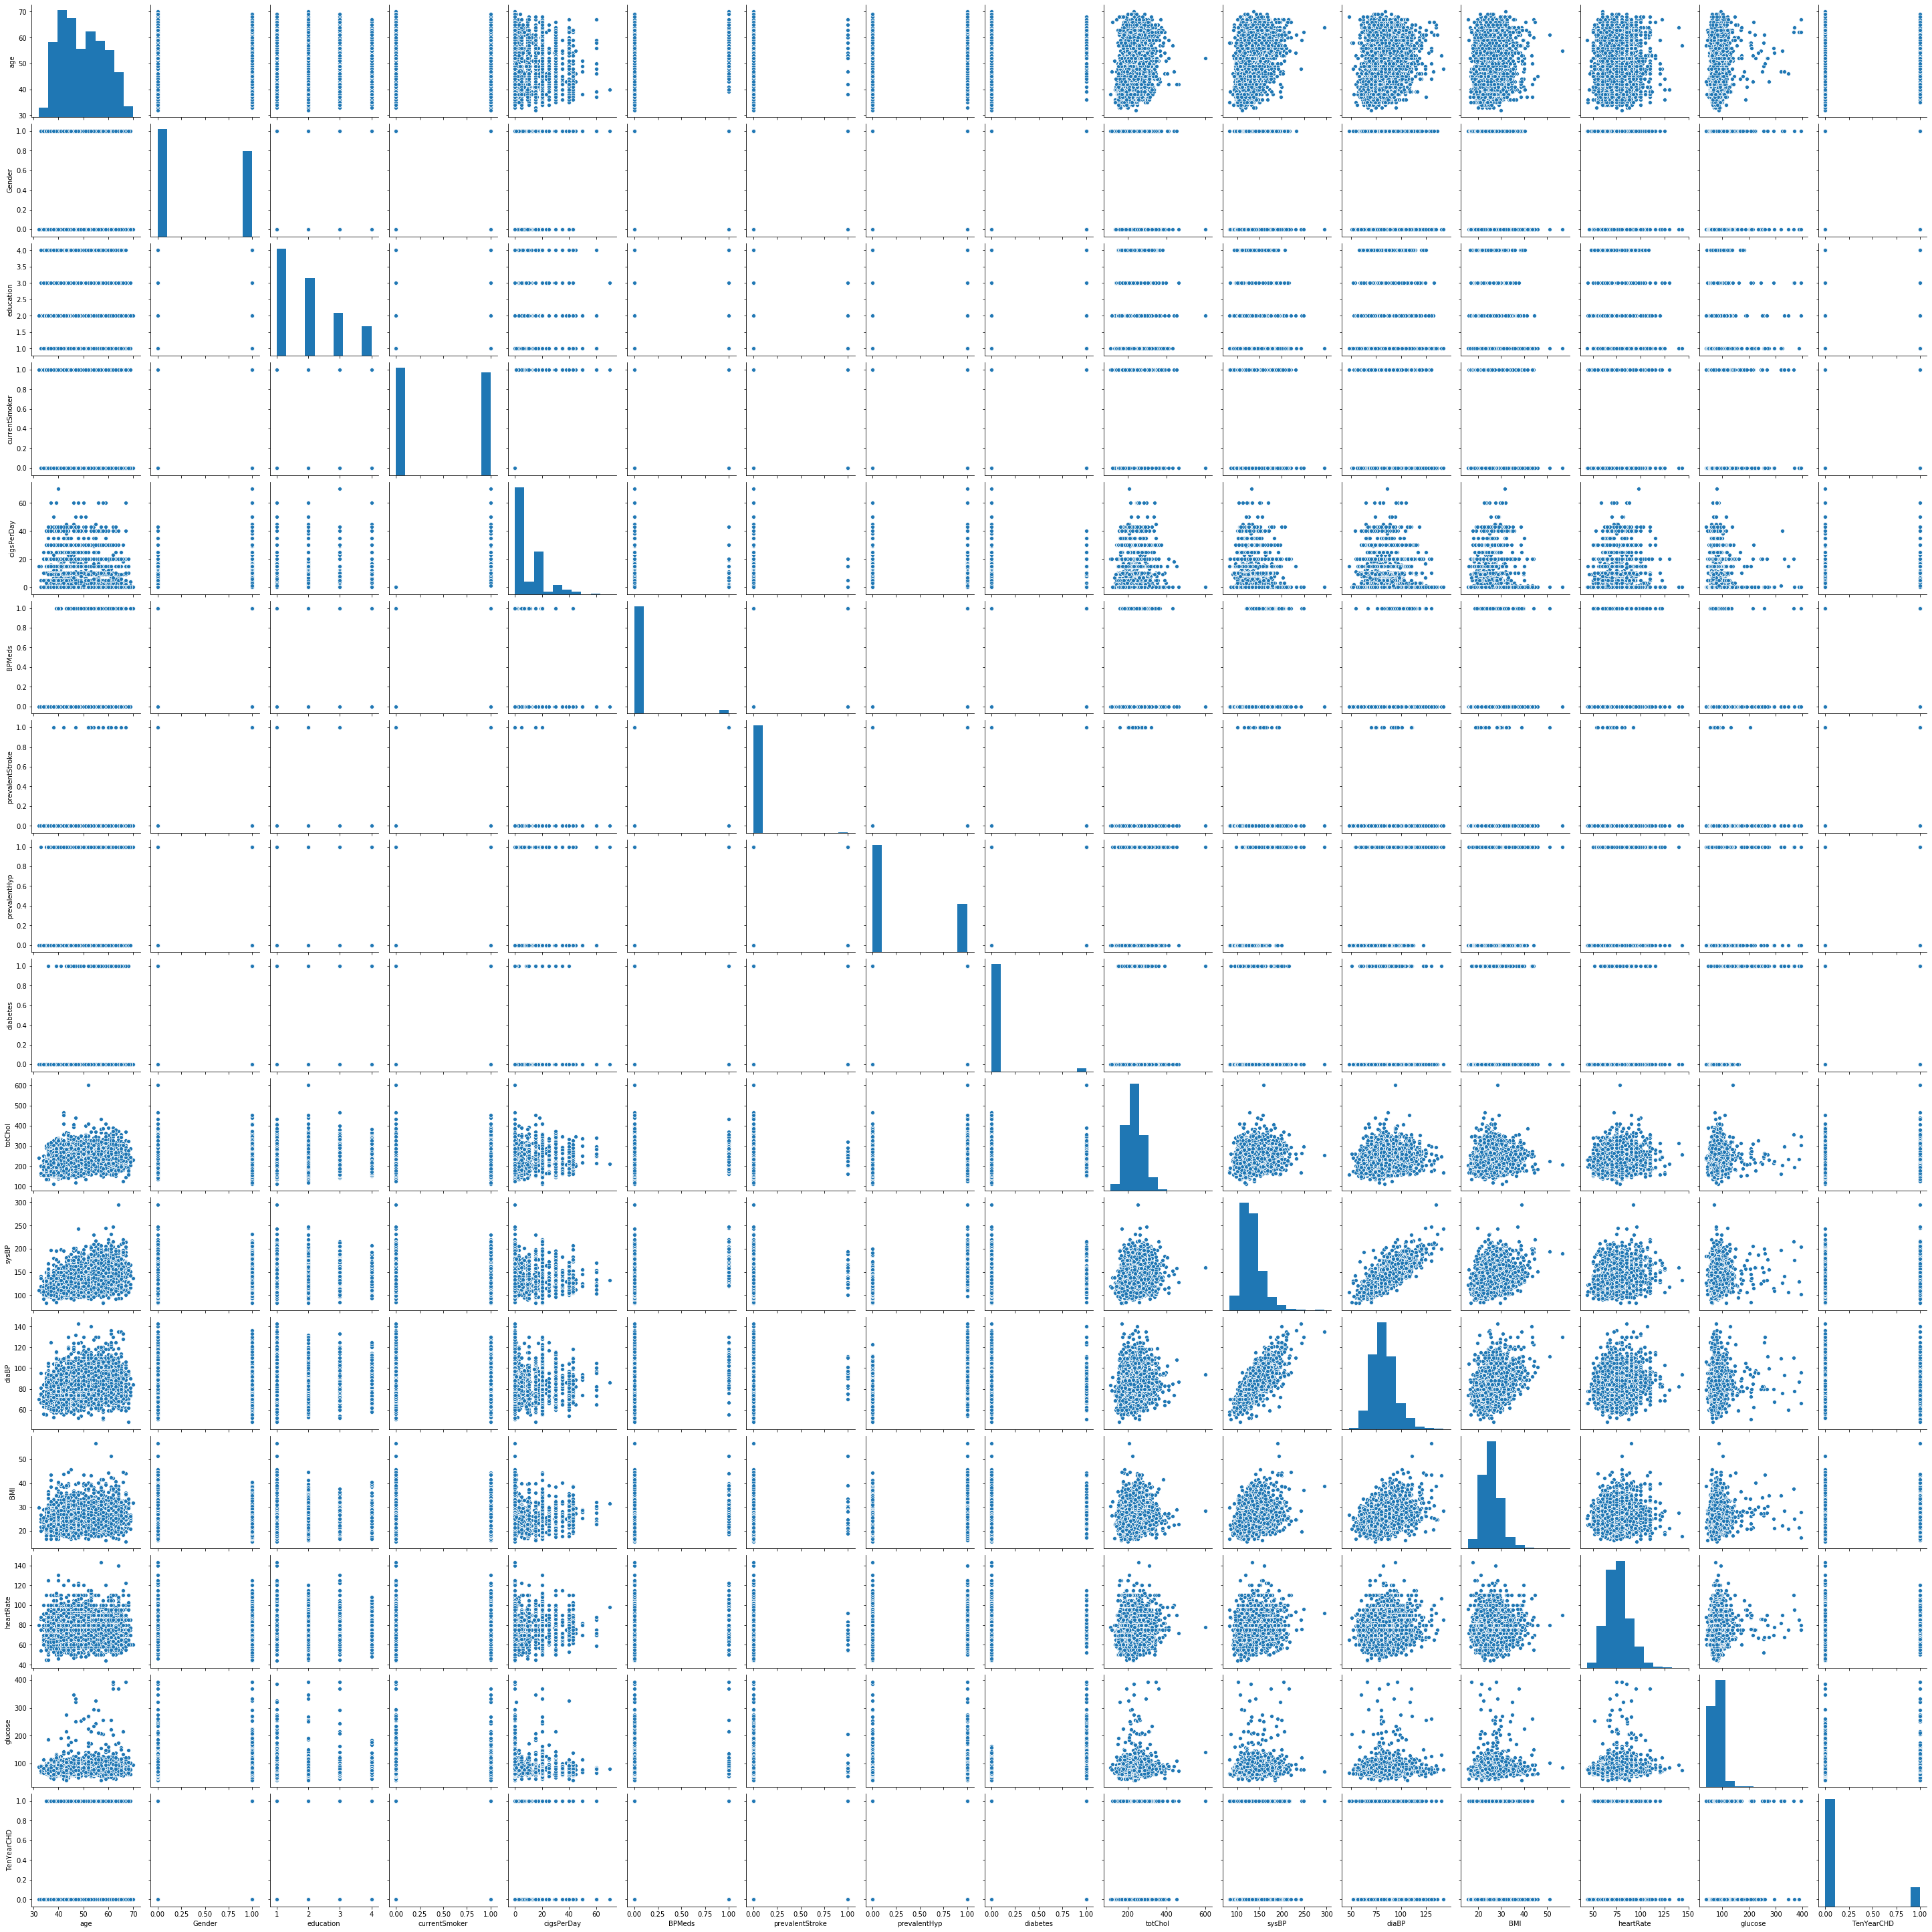

In [14]:
sns.pairplot(Heart)                                                         #Overview of data

Split the Data set in Predictors and Predicted

In [9]:
feature_cols = ['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [10]:
X = Heart.iloc[:,0:15]                                              # Features
y = Heart.iloc[:,-1]                                                # Target variable

In [11]:
# split X and y into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0) 

**Naive Bayes Complement**

**Naive Bayes Complement Parameter:**
naive_bayes.ComplementNB()                                                            
        alpha :Additive (Laplace/Lidstone) smoothing parameter.

In [7]:
NBayesC = naive_bayes.ComplementNB()                                #Tuning Parameter by grid search                    
parameters = [{'alpha': [0.1]},{'alpha': [0.25]},{'alpha': [0.50]},{'alpha': [1.0]},{'alpha': [1.5]},{'alpha': [2.0]},{'alpha': [5.0]},{'alpha': [10]},{'alpha': [15]},{'alpha': [20]}]
grid_search = GridSearchCV(estimator = NBayesC,                     #Tuning through grid search
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy                                                             #best accuracy score for the tuned parameter

0.6361342278741409

In [8]:
grid_search.best_params_                                        #Obtained parameter

{'alpha': 20}

NBComplement Train Accuracy : 0.6395348837209303
NBComplement Test Accuracy:  0.6584699453551912
Precision: 0.23985239852398524
Recall: 0.5963302752293578
Time in seconds 0.09075784683227539


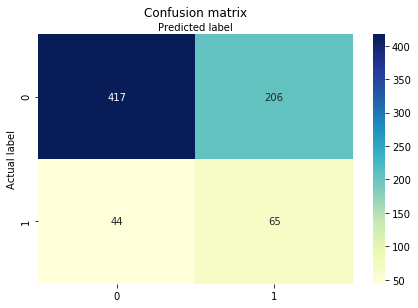

In [9]:
start=time.time()
NBayesC = naive_bayes.ComplementNB(alpha = 20)
NBayesC.fit(X_train,y_train)                                                    # Fit the data set for the classification
y_pred_TrainNB = NBayesC.predict(X_train)                                       # predicting the training data
y_pred_TestNB = NBayesC.predict(X_test)                                         # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestNB)              # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                                # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('NBComplement Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainNB))
print ('NBComplement Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestNB))
print("Precision:",metrics.precision_score(y_test, y_pred_TestNB))                    # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestNB))                          # Metrics for recall_score
stop=time.time()
print("Time in seconds", stop-start)

**ROC for Naive Bayes Complement**

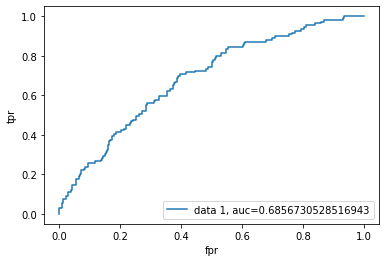

In [10]:
 
y_pred_probaNB = NBayesC.predict_proba(X_test)[::,1]                        #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaNB)                    #Receiver Operating Characteristic(ROC) curve 
auc = metrics.roc_auc_score(y_test, y_pred_probaNB)                         #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

**Learning curve with Test and training NaiveBayesComplement**

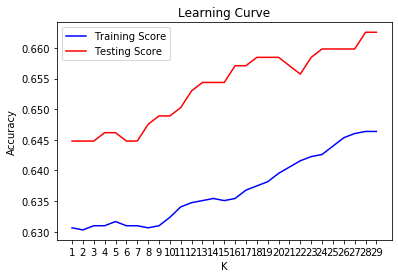

In [11]:
train_acc = []                                                      #training list 
pred_acc = []                                                       #predicting list
K = list(range(1,30))                                               

for k in K:

    NBayesC = naive_bayes.ComplementNB(alpha=k)                     #applying Naive_bayescomplement with alpha(smoothing parameter to study learning curve)
    NBayesC.fit(X_train,y_train)                                    #training the dataset

    y_pred_TrainNB = NBayesC.predict(X_train)                       #Predicting training data 
    y_pred_TestNB = NBayesC.predict(X_test)                         #Predicting testing data
        
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainNB))#metrics for training data 
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestNB))  #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**Naive BayesComplement Result:**

Acheived accuracy of 0.6584699453551912, which is 66% test accuracy.

In Roc cure: The Auc is 0.6856 the model is not ideal. 

Learning curve shows positive accuracy around 4 k value and graph shows overfitting. 

**Standardizing Data**

In [12]:
from sklearn.preprocessing import StandardScaler                    # Standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Naive Bayes Gaussian**

In [13]:
naive_bayes.GaussianNB()                                            # default paramter

GaussianNB(priors=None, var_smoothing=1e-09)

NBGaussian Train Accuracy : 0.8225034199726402
NBGaussian Test Accuracy:  0.8237704918032787
NBGaussian Precision: 0.3333333333333333
NBGaussian Recall: 0.1834862385321101
Time in seconds: 0.06482791900634766


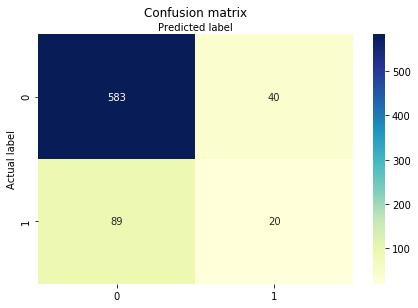

In [14]:
start=time.time()
NBayesG = naive_bayes.GaussianNB()

NBayesG.fit(X_train,y_train)                                            # Fit the data set for the classification
y_pred_TrainNG = NBayesG.predict(X_train)                               # predicting the training data
y_pred_TestNG = NBayesG.predict(X_test)                                 # predicting the test data 


Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestNG)      # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print ('NBGaussian Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainNG))
print ('NBGaussian Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestNG))
print("NBGaussian Precision:",metrics.precision_score(y_test, y_pred_TestNG))                    # Metrics for precision
print("NBGaussian Recall:",metrics.recall_score(y_test, y_pred_TestNG))                          # Metrics for recall_score
stop=time.time()
print("Time in seconds:", stop-start)

**ROC forNaive Bayes Gaussian**

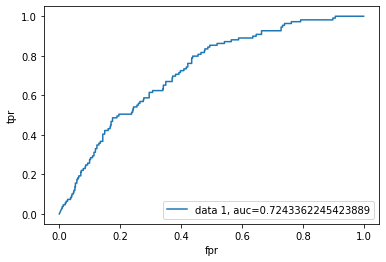

In [19]:
y_pred_probaNG = NBayesG.predict_proba(X_test)[::,1]                    #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaNG)                #Receiver Operating Characteristic(ROC) curve

auc = metrics.roc_auc_score(y_test, y_pred_probaNG)                     #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

**Learning curve with Test and training (naive_bayes.GaussianNB)**

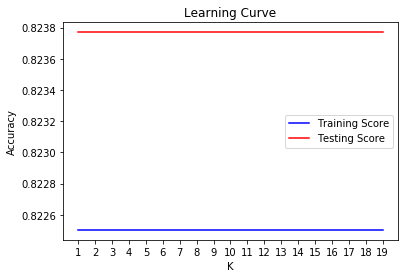

In [20]:
train_acc = []                                                          #training list 
pred_acc = []                                                           #predicting list
K = list(range(1,20))

for k in K:

    NBayesG = naive_bayes.GaussianNB()                                  #applying Naive_bayesGaussian
    NBayesG.fit(X_train,y_train)                                        #training the dataset
    
    y_pred_TrainNG = NBayesG.predict(X_train)                           #Predicting training data
    y_pred_TestNG = NBayesG.predict(X_test)                             #Predicting testing data
        
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainNG))    #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestNG))      #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**Naive Bayes Gaussian Result:**

Acheived accuracy of 0.8237, which is 82% test accuracy.

In Roc cure: The Auc is 0.724 the model is not bad model. 

Learning curve shows shows it is a overfitting model. 

** Naive Bayes Bernoulli**

In [33]:
naive_bayes.BernoulliNB()                                                   #Tuning parameter

  alpha :Additive (Laplace/Lidstone) smoothing parameter.

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
NBayesB= naive_bayes.BernoulliNB()                                     
parameters = [{'alpha': [0.1]},{'alpha': [0.25]},{'alpha': [0.50]},{'alpha': [1.0]},{'alpha': [1.5]},{'alpha': [2.0]},{'alpha': [5.0]},{'alpha': [10]},{'alpha': [15]},{'alpha': [20]}]
grid_search = GridSearchCV(estimator = NBayesB,                              #Tuning through grid search
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy                                                                      #best accuracy score for the tuned parameter

0.8146570667165365

In [16]:
grid_search.best_params_

{'alpha': 20}

Train Accuracy : 0.8177154582763337
Test Accuracy:  0.8087431693989071
Precision: 0.3037974683544304
Recall: 0.22018348623853212
Time inseconds 0.09175539016723633


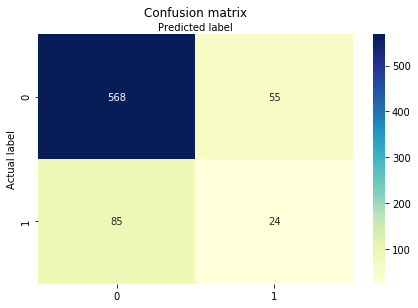

In [18]:
start=time.time()
NBayesB = naive_bayes.BernoulliNB(alpha = 20)
NBayesB.fit(X_train,y_train)                                                    # Fit the data set for the classification

y_pred_TrainNBB = NBayesB.predict(X_train)                                      # predicting the training data
y_pred_TestNBB = NBayesB.predict(X_test)                                        # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestNBB)             # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                               # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print ('Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainNBB))  # Metrics for training accuracy
print ('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestNBB))    # Metrics for testing accuracy
print("Precision:",metrics.precision_score(y_test, y_pred_TestNBB))               # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestNBB))                     # Metrics for recall_score
stop=time.time()
print("Time inseconds", stop-start)


**ROC for Naive Bayes Bernoulli**

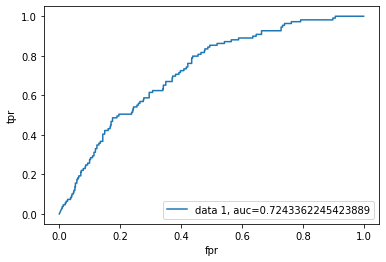

In [24]:
y_pred_probaNBB = NBayesG.predict_proba(X_test)[::,1]                       #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaNBB)                   #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaNBB)                        #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

**Learning curve with Test and training Naive Bayes Bernoulli**


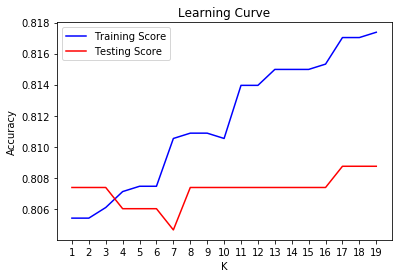

In [25]:
train_acc = []                                                                    #training list 
pred_acc = []                                                                     #predicting list
K = list(range(1,20))

for k in K:

    NBayesB = naive_bayes.BernoulliNB(alpha=k)                                    #applying Naive_bayes Bernoulli with alpha(smoothing parameter to study learning curve)
    NBayesB.fit(X_train,y_train)
    
    y_pred_TrainNBB = NBayesB.predict(X_train)                                    #Predicting training data
    y_pred_TestNBB = NBayesB.predict(X_test)                                      #Predicting testing data
        
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainNBB))              #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestNBB))                #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**Naive Bayes Bernoulli Result:**

Naive Bayes Bernoulli Result:
Acheived accuracy of 0.8087, which show it has 80% test accuracy.

In Roc cure: The Auc is0.7243 the model is not bad model. 

Learning curve shows positive result of o.808 accuracy at the k value 3.

**LogisticRegression**

#Tunning Parameter:

LogisticRegression()

Penalty:l1,l2,elasticnet. Used to specify the norm used in the penalization. Solver:newton-cg, lbfgs, liblinear, sag, saga
        (liblinear: small datasets; sag and saga: Are faster).
      

In [26]:
logistic = LogisticRegression() #Create a logistics object
parameters = [{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['saga']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['l2'], 'solver':['saga']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['elasticnet'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['elasticnet'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['elasticnet'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['elasticnet'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['auto'],'penalty': ['elasticnet'], 'solver':['saga']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['saga']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['l2'], 'solver':['saga']}]
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['elasticnet'], 'solver':['lbfgs']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['elasticnet'], 'solver':['newton-cg']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['elasticnet'], 'solver':['liblinear']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['elasticnet'], 'solver':['sag']},
{'C': [1.0], 'multi_class':['ovr'],'penalty': ['elasticnet'], 'solver':['saga']}
grid_search = GridSearchCV(estimator = logistic,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy
grid_search.best_params_

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [20]:
logistic = LogisticRegression(C = 1.0, multi_class = 'auto', penalty = 'l2', solver = 'lbfgs')


Train Accuracy : 0.853625170998632
Test Accuracy:  0.8538251366120219
Precision: 0.5714285714285714
Recall: 0.07339449541284404
Time inseconds 0.10372138023376465


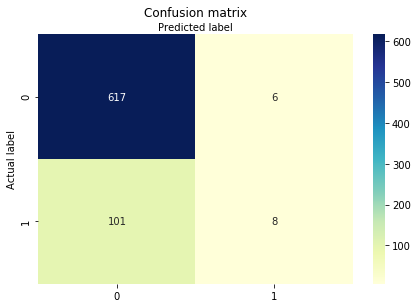

In [21]:
start=time.time()

logistic.fit(X_train,y_train)                                                      # Fit the data set for the classification

y_pred_TrainL = logistic.predict(X_train)                                          # predicting the training data
y_pred_TestL = logistic.predict(X_test)                                            # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestL)                  # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                                   # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')    # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print ('Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainL))
print ('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestL))
print("Precision:",metrics.precision_score(y_test, y_pred_TestL))                    # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestL))                          # Metrics for recall_score
stop=time.time()
print("Time inseconds", stop-start)


**ROC for LogisticClassifier**

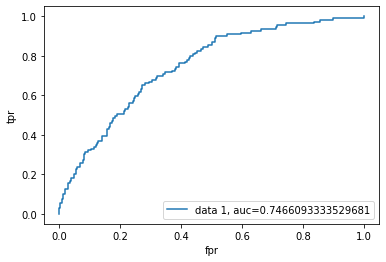

In [33]:
y_pred_probaL = logistic.predict_proba(X_test) [::,1]                       #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaL)                     #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaL)                          #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

**Learning curve with Test and training LogisticClassifier**

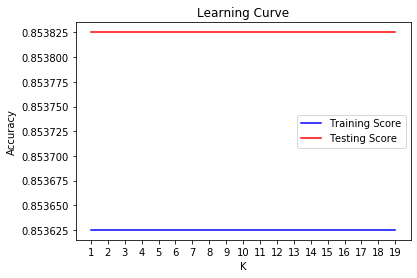

In [29]:
train_acc = []                                                             #training list
pred_acc = []                                                              #predicting list
K = list(range(1,20))


for k in K:

    Logistic = LogisticRegression (penalty='l2')                           #applying LogisticRegression
    Logistic.fit(X_train,y_train)
    
    y_pred_TrainL = Logistic.predict(X_train)                               #Predicting training data

    y_pred_TestL = Logistic.predict(X_test)                                 #Predicting testing data
            
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainL))        #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestL))          #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**LogisticClassifier Result:**

Acheived accuracy of 0.8538, which show it has 85% testaccuracy. 

In Roc cure: The Auc is 0.75 the model is good model. 

Learning curve shows overfitting curve.

**DecisionTreeClassifier**

In [43]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier
    criterion:
       gini,entropy. The function to measure the quality of a split (Gini impurity and entropy for the  information gain).
    splitter: 
       Best,random. 
    max_depth:
       maximum depth of the tree.
    max_features:
       sqrt=sqrt(n_features).
    log2=log2(n_features).
       class_weight: dict or balanced. Weights associated with classes

In [30]:
dtree=DecisionTreeClassifier()                                   #Parameter Tuning
parameters = [{'criterion': ['gini'], 'splitter':['best'],'max_features': ['auto'], 'class_weight':['balanced']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['auto'], 'class_weight':['balanced']},
{'criterion': ['gini'], 'splitter':['best'],'max_features': ['sqrt'], 'class_weight':['balanced']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['sqrt'], 'class_weight':['balanced']},
{'criterion': ['gini'], 'splitter':['best'],'max_features': ['log2'], 'class_weight':['balanced']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['log2'], 'class_weight':['balanced']},
{'criterion': ['gini'], 'splitter':['best'],'max_features': ['auto'], 'class_weight':['dict']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['auto'], 'class_weight':['dict']},
{'criterion': ['gini'], 'splitter':['best'],'max_features': ['sqrt'], 'class_weight':['dict']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['sqrt'], 'class_weight':['dict']},
{'criterion': ['gini'], 'splitter':['best'],'max_features': ['log2'], 'class_weight':['dict']},
{'criterion': ['entropy'], 'splitter':['best'],'max_features': ['log2'], 'class_weight':['dict']}]
grid_search = GridSearchCV(estimator = dtree,                   #Tuning parameter with gridsearch
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy                                                         #accuracy metrixcs for grid search 

0.7736137734349431

In [31]:
grid_search.best_params_                                         #best parameter from grid search

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'log2',
 'splitter': 'best'}

Tree Train Accuracy : 0.6617647058823529
Tree Test Accuracy:  0.644808743169399
Precision: 0.22545454545454546
Recall: 0.5688073394495413
Time inseconds 0.08776617050170898


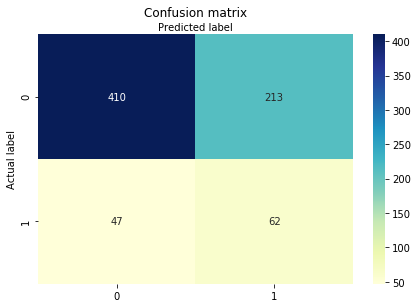

In [22]:
start=time.time()
dtree = DecisionTreeClassifier(class_weight = 'balanced', criterion='gini', max_features='log2', splitter='best', max_depth=5)
dtree.fit(X_train,y_train)                                                     # Fit the data set for the classification
y_pred_TrainD = dtree.predict(X_train)                                          # predicting the training data
y_pred_TestD = dtree.predict(X_test)                                            # predicting the test data 


Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestD)               # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                               # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainD))
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestD))         # Metrics for accuracy
print("Precision:",metrics.precision_score(y_test, y_pred_TestD))                    # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestD))                          # Metrics for recall_score
stop=time.time()
print("Time inseconds", stop-start)


**ROC for DecisionTreeClassifier**

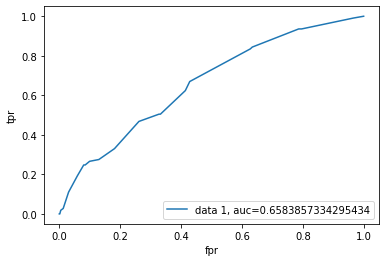

In [33]:
y_pred_probaD = dtree.predict_proba(X_test)[::,1]                   #Get probailities 

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaD)             #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaD)                  #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

In [39]:
feature_cols = ['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [ ]:
DecisionTreeClassifier()

Tree Train Accuracy : 0.6692886456908345
Tree Test Accuracy:  0.6639344262295082


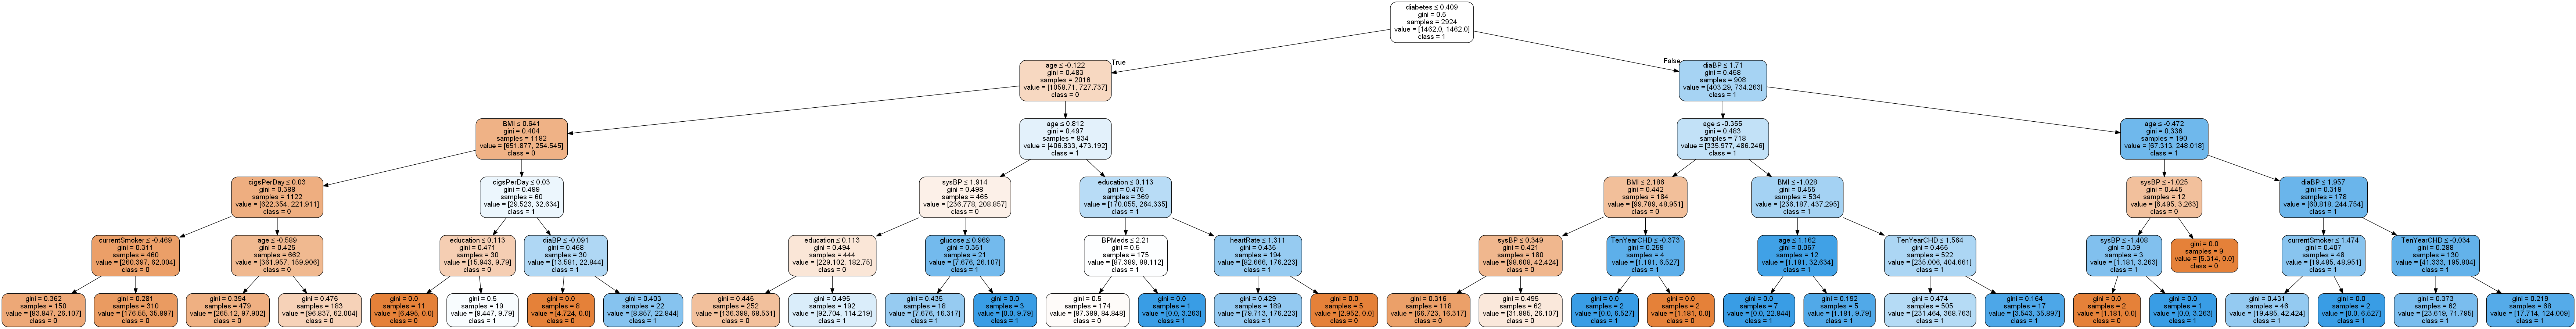

In [34]:
dtree = DecisionTreeClassifier(class_weight = 'balanced', criterion='gini', max_features='log2', splitter='best', max_depth=5)
dtree.fit(X_train,y_train)

y_pred_TrainDT = dtree.predict(X_train) #Predictions
y_pred_TestDT = dtree.predict(X_test) #Predictions

print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainDT))
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestDT))

dot_data = StringIO()

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('Heart_prunned.png')

Image(graph.create_png())


**Learning curve with Test and training DecisionTreeClassifier**

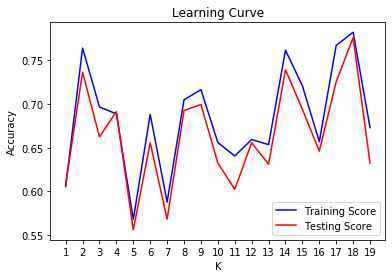

In [35]:
train_acc = []                                                          #training list 
pred_acc = []                                                           #training list 

K = list(range(1,20))

for k in K:

    dtree = DecisionTreeClassifier(class_weight = 'balanced', criterion='gini', max_features='log2', splitter='best', max_depth=5)
    dtree.fit(X_train,y_train)                                          #applying DecisionTreeClassifier
    
    y_pred_TrainD = dtree.predict(X_train)                              #Predicting training data
    y_pred_TestD = dtree.predict(X_test)                                #Predicting testing data

    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainD))     #metrics for training data

    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestD))       #metrics for testing data

       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()


**DecisionTreeClassifier Result:**

Acheived accuracy of 0.698, which show it has 70% test accuracy. 
In Roc cure: The Auc is 0.658 the model is a not ideal model. 
Learning curve shows positive result at 2k value.


**KNeighborsClassifier**

In [21]:
KNeighborsClassifier()

n_neighbors:
    Number of neighbors to use.
weights:
    uniform(uniform weights), distance (weight points by the inverse of their distance.)
algorithm:
    auto,ball_tree,kd_tree,brute


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
KNNclassifier=KNeighborsClassifier(n_neighbors=4)
KNNclassifier.fit(X_train, y_train)
parameters = [{'n_neighbors': [5], 'weights':['uniform'],'algorithm': ['auto']},
{'n_neighbors': [5], 'weights':['uniform'],'algorithm': ['ball_tree']},
{'n_neighbors': [5], 'weights':['uniform'],'algorithm': ['kd_tree']},
{'n_neighbors': [5], 'weights':['uniform'],'algorithm': ['brute']},
{'n_neighbors': [5], 'weights':['distance'],'algorithm': ['auto']},
{'n_neighbors': [5], 'weights':['distance'],'algorithm': ['ball_tree']},
{'n_neighbors': [5], 'weights':['distance'],'algorithm': ['kd_tree']},
{'n_neighbors': [5], 'weights':['distance'],'algorithm': ['brute']},
{'n_neighbors': [4], 'weights':['uniform'],'algorithm': ['auto']},
{'n_neighbors': [4], 'weights':['uniform'],'algorithm': ['ball_tree']},
{'n_neighbors': [4], 'weights':['uniform'],'algorithm': ['kd_tree']},
{'n_neighbors': [4], 'weights':['uniform'],'algorithm': ['brute']},
{'n_neighbors': [4], 'weights':['distance'],'algorithm': ['auto']},
{'n_neighbors': [4], 'weights':['distance'],'algorithm': ['ball_tree']},
{'n_neighbors': [4], 'weights':['distance'],'algorithm': ['kd_tree']},
{'n_neighbors': [4], 'weights':['distance'],'algorithm': ['brute']},
{'n_neighbors': [3], 'weights':['uniform'],'algorithm': ['auto']},
{'n_neighbors': [3], 'weights':['uniform'],'algorithm': ['ball_tree']},
{'n_neighbors': [3], 'weights':['uniform'],'algorithm': ['kd_tree']},
{'n_neighbors': [3], 'weights':['uniform'],'algorithm': ['brute']},
{'n_neighbors': [3], 'weights':['distance'],'algorithm': ['auto']},
{'n_neighbors': [3], 'weights':['distance'],'algorithm': ['ball_tree']},
{'n_neighbors': [3], 'weights':['distance'],'algorithm': ['kd_tree']},
{'n_neighbors': [3], 'weights':['distance'],'algorithm': ['brute']}]
grid_search = GridSearchCV(estimator = KNNclassifier,                            #Tuning parameter with gridsearch
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

accuracy = grid_search.best_score_
accuracy                                                                         #accuracy metrixcs for grid search

0.8419958857356585

In [37]:
grid_search.best_params_                                                         #best parameter from grid search

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

Tree Train Accuracy : 0.8662790697674418
Tree Test Accuracy:  0.8442622950819673
Precision: 0.391304347826087
Recall: 0.08256880733944955
Time inseconds 0.39795637130737305


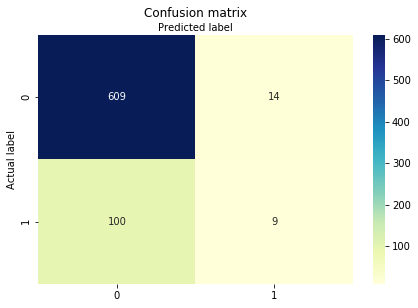

In [38]:
start=time.time()
KNNclassifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
KNNclassifier.fit(X_train,y_train)                                                 # Fit the data set for the classification
y_pred_TrainK = KNNclassifier.predict(X_train)                                     # predicting the training data
y_pred_TestK = KNNclassifier.predict(X_test)                                       # predicting the test data 


Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestK)                  # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                                  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')     # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainK))
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestK))
print("Precision:",metrics.precision_score(y_test, y_pred_TestK))                    # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestK))                          # Metrics for recall_score
stop=time.time()
print("Time inseconds", stop-start)

**ROC for KNeighborsClassifier**

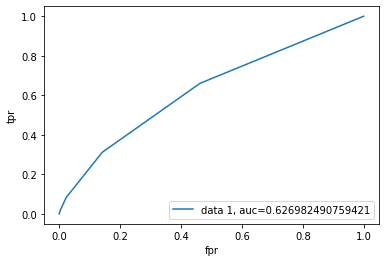

In [39]:
y_pred_probaK = KNNclassifier.predict_proba(X_test)[::,1]       #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaK)         #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaK)              #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()

**Learning curve with Test and training KNeighborsClassifier**

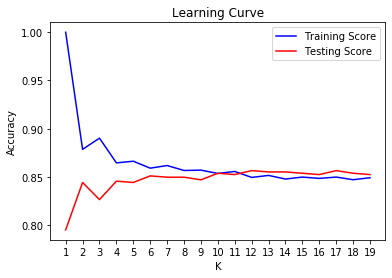

In [40]:
train_acc = []                                                               #training list 
pred_acc = []                                                                #predicting list

K = list(range(1,20))

for k in K:

    KNNclassifier = KNeighborsClassifier(n_neighbors=k)                     #applying KNeighborsClassifier with n_neighbours parameter
    KNNclassifier.fit(X_train,y_train)
    
    y_pred_TrainK = KNNclassifier.predict(X_train)                          #Predicting training data
    y_pred_TestK = KNNclassifier.predict(X_test)                            #Predicting testing data

        
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainK))         #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestK))           #metrics for testing data

       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**KNeighborsClassifierResult:**

Acheived test accuracy of 0.844, which show it has 84% accuracy. 

In Roc cure: The Auc is 0.62 hence the model is a not ideal model. 

Learning curve shows positive result at 2k value.

**RandomForestClassifier**

In [ ]:
RandomForestClassifier()
    n_estimators: The number of trees in the forest.
    criterion: gini, entropy
    max_features: auto, sqrt, log2
    class_weight: balanced, dict

In [42]:
dForest = RandomForestClassifier()                                               #Parameter Tuning

parameters = [{'criterion': ['gini'], 'max_features': ['sqrt'], 'class_weight': ['balanced']},
{'criterion': ['entropy'], 'max_features': ['sqrt'], 'class_weight': ['balanced']},
{'criterion': ['gini'], 'max_features': ['log2'], 'class_weight': ['balanced']},
{'criterion': ['entropy'], 'max_features': ['log2'], 'class_weight': ['balanced']},
{'criterion': ['gini'], 'max_features': ['log2'], 'class_weight': ['balanced_subsample']},
{'criterion': ['entropy'], 'max_features': ['log2'], 'class_weight': ['balanced_subsample']},
{'criterion': ['gini'], 'max_features': ['sqrt'], 'class_weight': ['balanced_subsample']},
{'criterion': ['entropy'], 'max_features': ['sqrt'], 'class_weight': ['balanced_subsample']}]
grid_search = GridSearchCV(estimator = dForest,                                    #Tuning parameter with gridsearch
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


grid_search = grid_search.fit(X_train, y_train)                     
accuracy = grid_search.best_score_
accuracy                                                                        #accuracy metrixcs for grid search

0.8474765066155501

In [43]:
grid_search.best_params_                                                          #best parameter from grid search

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt'}

Tree Train Accuracy : 1.0
Tree Test Accuracy:  0.8524590163934426
Precision: 0.5555555555555556
Recall: 0.045871559633027525
Time inseconds 0.0


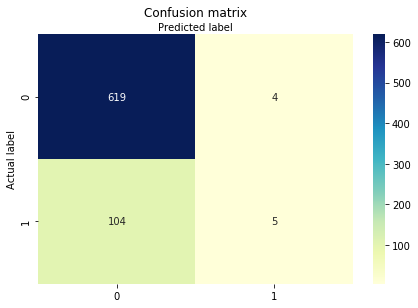

In [27]:
start=time.time()
dForest = RandomForestClassifier(class_weight = 'balanced_subsample', criterion = 'gini', max_features = 'log2')

dForest.fit(X_train,y_train)                                                 # Fit the data set for the classification
y_pred_TrainR = dForest.predict(X_train)                                     # predicting the training data
y_pred_TestR = dForest.predict(X_test)                                       # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestR)            # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                            # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainR)) #metrics for training data
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestR))   #metrics for testing data
print("Precision:",metrics.precision_score(y_test, y_pred_TestR))              # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestR))                    # Metrics for recall_score
start=time.time()
stop=time.time()
print("Time inseconds", stop-start)


**ROC for RandomForestClassifier**

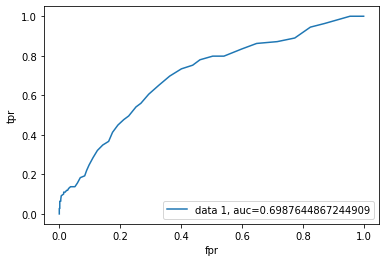

In [50]:
y_pred_probaR = dForest.predict_proba(X_test) [::,1]                           #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaR)                        #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaR)                             #auc metrics
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()



**Learning curve with Test and training RandomForestClassifier**

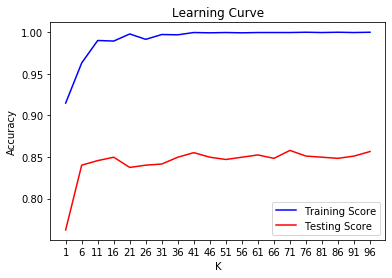

In [25]:
train_acc = []                                                                  #training list 
pred_acc = []                                                                   #predicting list
K = list(range(1,100, 5))

for k in K:

    dForest = RandomForestClassifier(n_estimators=k)                            #applying RandomForestClassifier
    dForest.fit(X_train,y_train)

    y_pred_TrainR = dForest.predict(X_train)                                    #Predicting training data
    y_pred_TestR = dForest.predict(X_test)                                      #Predicting testing data
        
    train_acc.append(metrics.accuracy_score(y_train,y_pred_TrainR))
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestR))
       
plt.plot(K,train_acc,'b', label = 'Training Score')                             #metrics for training data
plt.plot(K,pred_acc,'r', label = 'Testing Score')                               #metrics for testing data
plt.title('Learning Curve')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

**#Random Forest Classifier Results:**

Acheived test accuracy of 0.8524, which show it has 85% accuracy. 

In Roc cure: The Auc is 0.70 hence the model is not a bad model. 

Learning curve shows positive result at 17 k value.

**ExtraTreesClassifier**

In [ ]:
ExtraTreesClassifier()                                               
    n_estimators: The number of trees in the forest.
    criterion: gini, entropy
    max_features: auto, sqrt, log2
    class_weight: balanced, dict
    max_depth: The maximum depth of the tree. 

In [44]:
EXclassifier=ExtraTreesClassifier()                                                     #Parameter Tuning
parameters = [{'n_estimators':[5], 'criterion':['gini'], 'max_depth':[5], 'max_features':['auto']},
{'n_estimators':[5], 'criterion':['entropy'], 'max_depth':[5], 'max_features':['auto']},
{'n_estimators':[4], 'criterion':['gini'], 'max_depth':[4], 'max_features':['sqrt']},
{'n_estimators':[4], 'criterion':['entropy'], 'max_depth':[4], 'max_features':['sqrt']},
{'n_estimators':[3], 'criterion':['gini'], 'max_depth':[3], 'max_features':['log2']},
{'n_estimators':[3], 'criterion':['entropy'], 'max_depth':[3], 'max_features':['log2']}]

In [45]:
grid_search = GridSearchCV(estimator = EXclassifier,                                #Tuning parameter with gridsearch
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy                                                                           #accuracy metrixcs for grid search

0.8474671560147741

In [46]:
grid_search.best_params_                                                           #best parameter from grid search

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 4}

Tree Train Accuracy : 0.850547195622435
Tree Test Accuracy:  0.8510928961748634
Precision: 0.0
Recall: 0.0
Time inseconds 0.0


C:\Users\renga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


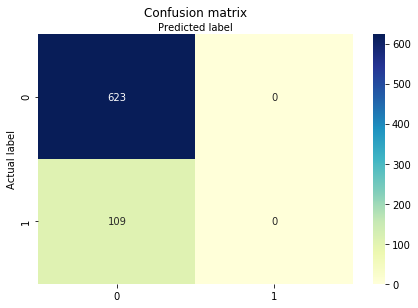

In [48]:
start=time.time()
ETrees = ExtraTreesClassifier(criterion = 'entropy', max_depth = 5, max_features = 'auto', n_estimators= 5)

ETrees.fit(X_train,y_train)                                                 # Fit the data set for the classification


y_pred_TrainE = ETrees.predict(X_train)                                          # predicting the training data
y_pred_TestE = ETrees.predict(X_test)                                            # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestE)                     # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                               # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainE))
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestE))
print("Precision:",metrics.precision_score(y_test, y_pred_TestE))                    # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestE))                          # Metrics for recall_score
start=time.time()
stop=time.time()
print("Time inseconds", stop-start)

**ROC for ExtraTreesClassifier**

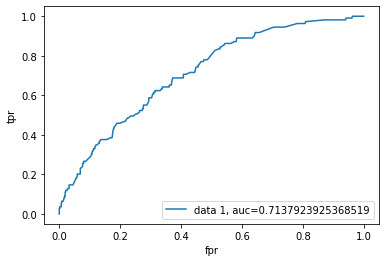

In [58]:
y_pred_probaE = ETrees.predict_proba(X_test) [::,1]                  #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaE)              #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaE)                   #auc metrics
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()



**Learning curve with Test and training ExtraTreesClassifier**

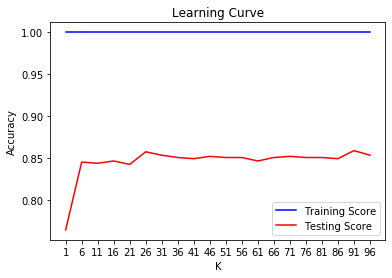

In [49]:
train_acc = []                                                                             #training list 
pred_acc = []                                                                              #predicting list
K = list(range(1,100,5))

for k in K:
    ETrees = ExtraTreesClassifier(n_estimators=k)                                          #applying ExtraTreesClassifier
    ETrees.fit(X_train,y_train)

    y_pred_TrainE = ETrees.predict(X_train)                                                #Predicting training data
    y_pred_TestE = ETrees.predict(X_test)                                                  #Predicting testing data
    train_acc.append(metrics.accuracy_score(y_train, y_pred_TrainE))                       #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestE))                          #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.title('Learning Curve')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(K)
plt.legend(loc = 'best')
plt.show()

**ExtraTreesClassifier Result:**

Acheived test accuracy of 0.8510, which show it has 85% accuracy. 

In Roc cure: The Auc is 0.713 hence the model is good a model. 

Learning curve shows positive result at 16 k value.

**GradientBoostingClassifier**

In [22]:
GradientBoostingClassifier()                                                        

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Tuning Parameter:
    loss: ‘deviance’, ‘exponential’ 
        Loss function paramter are optimized, where deviance refers to deviance (= logistic regression) 
        for classification with probabilistic outputs. 
        Loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
    criterion:‘friedman_mse’, ‘mse’, ‘mae’
        The function to measure the quality of a split.
    max_features:‘auto’, ‘sqrt’, ‘log2’
        Sqrt & auto, then max_features=sqrt(n_features).
        log2, then max_features=log2(n_features).
        None, then max_features=n_features

In [50]:
GBoost = GradientBoostingClassifier()                                                 #Parameter Tuning
parameters = [
{'loss': ['deviance'], 'criterion': ['friedman_mse'], 'max_features': ['sqrt']},
{'loss': ['exponential'], 'criterion': ['friedman_mse'], 'max_features': ['sqrt']},
{'loss': ['deviance'], 'criterion': ['mse'], 'max_features': ['sqrt']},
{'loss': ['exponential'], 'criterion': ['mse'], 'max_features': ['sqrt']},
{'loss': ['deviance'], 'criterion': ['mae'], 'max_features': ['sqrt']},
{'loss': ['exponential'], 'criterion': ['mae'], 'max_features': ['sqrt']},
{'loss': ['deviance'], 'criterion': ['friedman_mse'], 'max_features': ['log2']},
{'loss': ['exponential'], 'criterion': ['friedman_mse'], 'max_features': ['log2']},
{'loss': ['deviance'], 'criterion': ['mse'], 'max_features': ['log2']},
{'loss': ['exponential'], 'criterion': ['mse'], 'max_features': ['log2']},
{'loss': ['deviance'], 'criterion': ['mae'], 'max_features': ['log2']},
{'loss': ['exponential'], 'criterion': ['mae'], 'max_features': ['log2']}]
grid_search = GridSearchCV(estimator = GBoost,                                   #Tuning parameter with gridsearch
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
accuracy = grid_search.best_score_
accuracy
grid_search.best_params_                                                        #best parameter from grid search

{'criterion': 'mse', 'loss': 'exponential', 'max_features': 'log2'}

Tree Train Accuracy : 0.8703830369357045
Tree Test Accuracy:  0.8565573770491803
Precision: 0.7
Recall: 0.06422018348623854
Time inseconds 0.2343738079071045


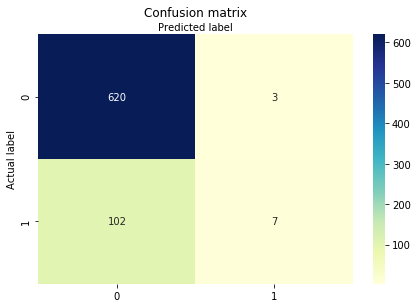

In [52]:
start=time.time()

GBoost=GradientBoostingClassifier(criterion = 'friedman_mse', loss = 'exponential', max_features = 'sqrt')
GBoost.fit(X_train,y_train)                                                    # Fit the data set for the classification
y_pred_TrainG = GBoost.predict(X_train)                                        # predicting the training data
y_pred_TestG = GBoost.predict(X_test)                                          # predicting the test data 

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred_TestG)              # Confusion Matrix
Confusion_matrix  
class_names=[0,1]                                                              # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Tree Train Accuracy :', metrics.accuracy_score(y_train,y_pred_TrainG))      #metrics for training data
print ('Tree Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_TestG))        #metrics for testing data   
print("Precision:",metrics.precision_score(y_test, y_pred_TestG))                   # Metrics for precision
print("Recall:",metrics.recall_score(y_test, y_pred_TestG))                         # Metrics for recall_score
stop=time.time()
print("Time inseconds", stop-start)

**ROC for GradientBoostingClassifier**

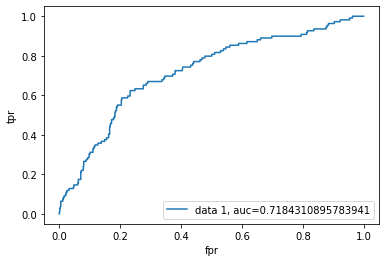

In [53]:

y_pred_probaG = GBoost.predict_proba(X_test) [::,1]            #Get probailities 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaG)        #Receiver Operating Characteristic(ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_probaG)             #auc metrics

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc=4)
plt.show()


**Learning curve with Test and training GradientBoostingClassifier**

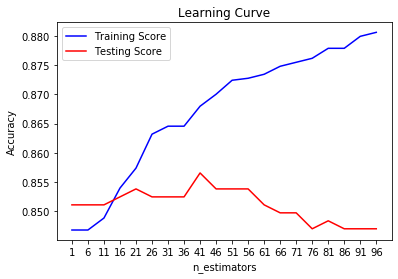

In [54]:
train_acc = []#training list 
pred_acc = []#predicting list
K = list(range(1,100,5))

for k in K:
    GBoost = GradientBoostingClassifier(n_estimators=k)                 #applying GradientBoostingClassifier
    GBoost.fit(X_train,y_train)

    y_pred_TrainG = GBoost.predict(X_train)                             #Predicting training data
    y_pred_TestG = GBoost.predict(X_test)                               #Predicting testing data


    
    train_acc.append(metrics.accuracy_score(y_train, y_pred_TrainG))    #metrics for training data
    pred_acc.append(metrics.accuracy_score(y_test, y_pred_TestG))       #metrics for testing data
       
plt.plot(K,train_acc,'b', label = 'Training Score')
plt.plot(K,pred_acc,'r', label = 'Testing Score')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.xticks(K)
plt.legend(loc = 'best')
plt.show()

**GradientBoostingClassifier Result:**

Acheived test accuracy of 0.856, which show it has 86% accuracy. 

In Roc cure: The Auc is 0.718 hence the model is a good model. 

Learning curve shows positive result at 21 k value.

**CONCLUSION:**

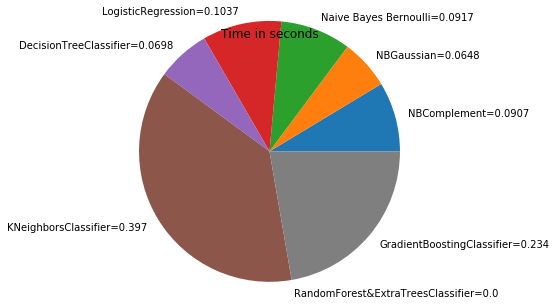

In [13]:
plt.title('Time in seconds')

exp_vals = [0.0907,0.0648,0.0917,0.103,0.069,0.397,0,0.234]
exp_labels = ['NBComplement=0.0907', 'NBGaussian=0.0648', 'Naive Bayes Bernoulli=0.0917','LogisticRegression=0.1037',
'DecisionTreeClassifier=0.0698', 'KNeighborsClassifier=0.397', 'RandomForest&ExtraTreesClassifier=0.0','GradientBoostingClassifier=0.234']
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels,radius=1.5)
plt.show()

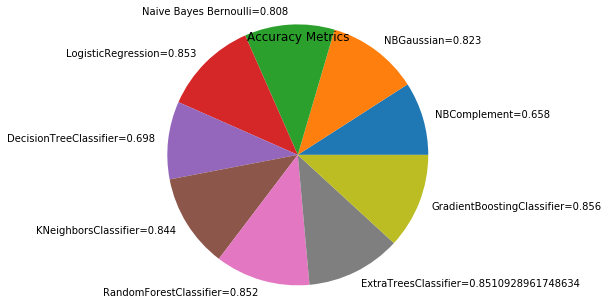

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

exp_vals = [0.658,0.823,0.808,0.853,0.698,0.844,0.852,0.851,0.856]
exp_labels =['NBComplement=0.658', 'NBGaussian=0.823', 'Naive Bayes Bernoulli=0.808','LogisticRegression=0.853','DecisionTreeClassifier=0.698',
'KNeighborsClassifier=0.844', 'RandomForestClassifier=0.852','ExtraTreesClassifier=0.8510928961748634','GradientBoostingClassifier=0.856']
plt.title('Accuracy Metrics')
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels,radius=1.5)
plt.show()

**Test Result:**

Classifier where used to predict heart disease.
    
1.NBComplement Train Accuracy : 0.6395348837209303;
   NBComplement Test Accuracy:  0.6584699453551912;
   NBComplement Precision: 0.23985239852398524;
   NBComplement Recall: 0.5963302752293578.
   
   
2. NBGaussian Train Accuracy : 0.8225034199726402;
   NBGaussian Test Accuracy:  0.8237704918032787;
   NBGaussian Precision: 0.3333333333333333;
   NBGaussian Recall: 0.1834862385321101.
   
   
3. Naive Bayes Bernoulli Train Accuracy : 0.8177154582763337;
   Naive Bayes Bernoulli Test Accuracy:  0.8087431693989071;
   Naive Bayes Bernoulli Precision: 0.3037974683544304;
   Naive Bayes Bernoulli Recall: 0.22018348623853212.
   
   
4. LogisticRegression Train Accuracy : 0.853625170998632;
   LogisticRegression Test Accuracy:  0.8538251366120219;
   LogisticRegression Precision: 0.5714285714285714;
   LogisticRegression Recall: 0.07339449541284404.
   
   
5. DecisionTreeClassifier Train Accuracy : 0.7308481532147743;
   DecisionTreeClassifier Test Accuracy:  0.6980874316939891;
   DecisionTreeClassifier Precision: 0.2383177570093458;
   DecisionTreeClassifier Recall: 0.46788990825688076.
   
   
6. KNeighborsClassifier Train Accuracy : 0.8662790697674418;
   KNeighborsClassifier Test Accuracy:  0.8442622950819673;
   KNeighborsClassifier Precision: 0.391304347826087;
   KNeighborsClassifier Recall: 0.08256880733944955.
   
   
7.RandomForestClassifier Tree Train Accuracy : 1.0;
   RandomForestClassifier Tree Test Accuracy:  0.8524590163934426;
   RandomForestClassifier Precision: 0.5555555555555556;
   RandomForestClassifier Recall: 0.045871559633027525.
   
   
8. ExtraTreesClassifier Train Accuracy : 0.850547195622435;
   ExtraTreesClassifier Test Accuracy:  0.8510928961748634;
   ExtraTreesClassifier Precision: 0.0;
   ExtraTreesClassifier Recall: 0.0.
   
   
9. GradientBoostingClassifier Train Accuracy : 0.8703830369357045;
   GradientBoostingClassifier Test Accuracy:  0.8565573770491803;
   GradientBoostingClassifier Precision: 0.7;
   GradientBoostingClassifier Recall: 0.06422018348623854.

**Result:**
Among all ten classification method gradient boost method have 86% in accuracy metrics. All the classifier other than 
Naive Bayes component and DecisionTreeClassifier has good, i.e, 80% accuracy score. 

Gradient boost method Result is proven bettr than other model.
1.Acheived test accuracy of 0.856, which show it has 86% accuracy.

True negative=620

True positive=7

False negative=102

False positive=3

2. ROC :An ROC curve shows the relationship between sensitivity and specificity. 
ROC curve is a graph based on confusion matrix. 
Roc summarises the true positive and false positives of confussion matrix based on threshold. 
The x-axis showing 1 – specificity (= false positive fraction = FP/(FP+TN))
The y-axis showing sensitivity (= true positive fraction = TP/(TP+FN))

Specificity and sensitivity are inversely proportional.
As AUC is near 1 means it is a good model. 
In Roc cure: The Auc is 0.718 hence the model is a good model. 

3.Learning curve shows positive result at 21 k value.

**Conclusion:** 
Heart disease paitients in Framingham with round 3656 observation are studied in this work. Ten diffrent classifier are used to predict test accuracy. The best result is discussed.
And consiredrable good results were acheived by most of the models. 
Because of limitations there were set back in other model. Overfitting was one of the limitation observed in the learning curve. 
Other limitation such as bias and variance have also influenced the results.

But Gradient boost method's Result is proven better than other model.
1.Acheived test accuracy of 0.856, which show it has 86% accuracy.
2.In Roc cure: The Auc is 0.718 hence the model is a good model. 
3.Learning curve shows positive result at 21 k value.

Hence Framingham's Heart disease paitients data has 86% test accuray.  